# Importing Packages and Loading Data

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LinearRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,roc_curve,roc_auc_score
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv(r"C:\Users\sadha\Downloads\archive (1)\UCI_Credit_Card.csv")



# Exploratory Data Analysis

## Date Overview and Cleaning:

In [3]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
#Checking for null column
for column in dataset:
    if dataset[column].isnull().values.any():
        print ("NaN value/s detected in ")+column
    else:
        print (column+ " is doesn't have null values")
    


ID is doesn't have null values
LIMIT_BAL is doesn't have null values
SEX is doesn't have null values
EDUCATION is doesn't have null values
MARRIAGE is doesn't have null values
AGE is doesn't have null values
PAY_0 is doesn't have null values
PAY_2 is doesn't have null values
PAY_3 is doesn't have null values
PAY_4 is doesn't have null values
PAY_5 is doesn't have null values
PAY_6 is doesn't have null values
BILL_AMT1 is doesn't have null values
BILL_AMT2 is doesn't have null values
BILL_AMT3 is doesn't have null values
BILL_AMT4 is doesn't have null values
BILL_AMT5 is doesn't have null values
BILL_AMT6 is doesn't have null values
PAY_AMT1 is doesn't have null values
PAY_AMT2 is doesn't have null values
PAY_AMT3 is doesn't have null values
PAY_AMT4 is doesn't have null values
PAY_AMT5 is doesn't have null values
PAY_AMT6 is doesn't have null values
default.payment.next.month is doesn't have null values


* There are no missing values in the dataset. 

In [5]:
# rename column to bring consistency
dataset.rename(columns={"PAY_0": "PAY_1", "default.payment.next.month": "DEFAULT"}, inplace=True)

* Checking the VALUES of the columns

In [6]:
# Checking the entries of the ID column
print(dataset["ID"].value_counts())
dataset.drop(["ID"], axis=1, inplace=True)

2047     1
1322     1
15629    1
9486     1
11535    1
        ..
17053    1
23198    1
21151    1
10928    1
2049     1
Name: ID, Length: 30000, dtype: int64


*The id entries are unique for every row and seem to serve the purpose of a serial number. I will drop that variable.

In [7]:
dataset.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [8]:
dataset.EDUCATION.value_counts()
#
# As per data dictionary there are 5 categories 1 to 5 for Education column and 5 and 6 are both showing as 'UNKNOWN'. There is no **0** category in the dictionary but present in dataset.
# Hence Combining 0, 5, and 6 together as 'UNKNOWN' category. Changing all 6 and 0 to 5.
# replacing 0,6 category to unknown category '5'
#
dataset['EDUCATION'].replace([0, 6], 5, inplace=True)
dataset.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [9]:
dataset.MARRIAGE.value_counts()
#
# As per data dictionary there are 3 categories 1 to 3 for Marriage column but '0' category present in dataset.
# Hence Combining '0' as 'Others' category. Changing all '0' to '3'.
#
dataset['MARRIAGE'].replace(0, 3, inplace=True)
dataset.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [10]:
dataset.PAY_2.value_counts()
dataset.PAY_6.value_counts()
dataset.DEFAULT.value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [11]:
# Checking the range of the numerical entries
dataset.describe(
    include="all"
).transpose()  # the transpose view makes it more reader-friendly

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853767,0.784391,1.0,1.00,2.0,2.00,5.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


* I notice that some of the bill_amti's are negative. Although surprising, it is not uncommon to have a negative balance because of merchant refunds or overpayments. The values are a bit on the higher side and I'll take another look later.

Text(0.5, 1.0, 'Distribution of defaulters vs non-defaulters')

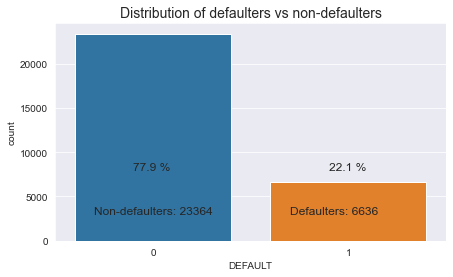

In [12]:
defs = dataset["DEFAULT"][(dataset["DEFAULT"] == 1)].count()
non_defs = dataset["DEFAULT"][(dataset["DEFAULT"] == 0)].count()
def_perc = round(defs / len(dataset) * 100, 1)
non_def_perc = round(non_defs / len(dataset) * 100, 1)
plt.figure(figsize=(7, 4))
sns.countplot(x = "DEFAULT", data = dataset)  
plt.annotate("Non-defaulters: {}".format(non_defs),
    xy=(-0.3, 15000),
    xytext=(-0.3, 3000),
    size=12,
)
plt.annotate(
    "Defaulters: {}".format(defs), xy=(0.7, 15000), xytext=(0.7, 3000), size=12
)
plt.annotate(str(non_def_perc) + " %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(def_perc) + " %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title("Distribution of defaulters vs non-defaulters", size=14)


## The relationship Between the Variables and Default

*I will study the relationship between the features and credit card default. Although this is not definitive, it will give me a good understanding of the data. This will also help me make decisions about some of the features having values different than what was provided in the data description.

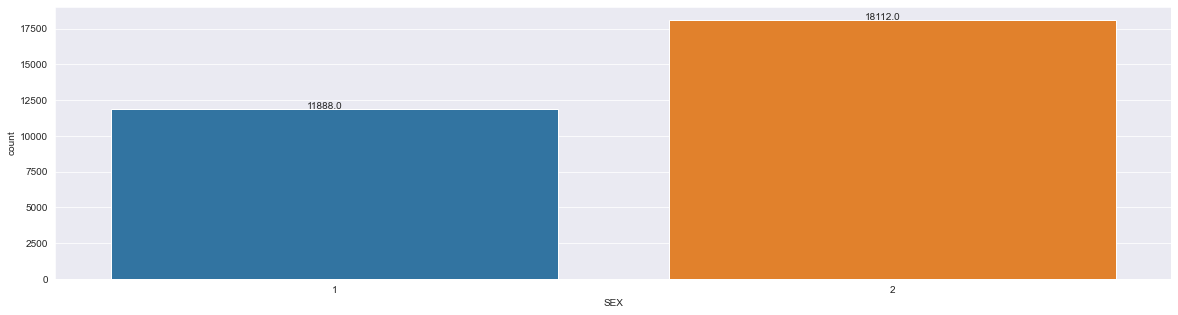

In [13]:
#Is default proportion affected by gender?
ax = sns.countplot(x = "SEX", data = dataset)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.2))

plt.show()

In [14]:
# Create function fo Bivariante analysis
#
def compare_defaults(df, col_name, dict_label={}):
    cross_tab = pd.crosstab(dataset["DEFAULT"], dataset[col_name], margins=True, normalize=False)
    new_index = {0: "Non-default proportion", 1: "Default proportion"}
    new_columns = dict_label
    cross_tab.rename(index=new_index, columns=new_columns, inplace=True)
    cross_tab_norm = cross_tab / cross_tab.loc["All"]  
    display(cross_tab_norm)
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=dataset[col_name], hue="DEFAULT", data=dataset)
    return cross_tab_norm
#

SEX,Male,Female,All
DEFAULT,,,
Non-default proportion,0.758328,0.792237,0.7788
Default proportion,0.241672,0.207763,0.2212
All,1.000000,1.000000,1.0000


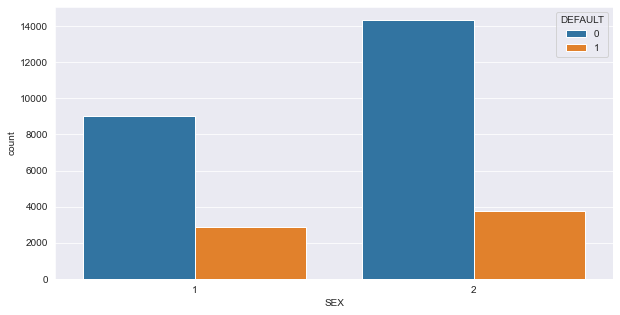

In [15]:
_= compare_defaults(dataset, 'SEX', {1: "Male", 2: "Female"})

Although there are more female credit card holders, the default proportion among men is higher

EDUCATION,Grad School,University,High School,Others,Unknown,All
DEFAULT,,,,,,
Non-default proportion,0.807652,0.762651,0.748424,0.943089,0.924638,0.7788
Default proportion,0.192348,0.237349,0.251576,0.056911,0.075362,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000


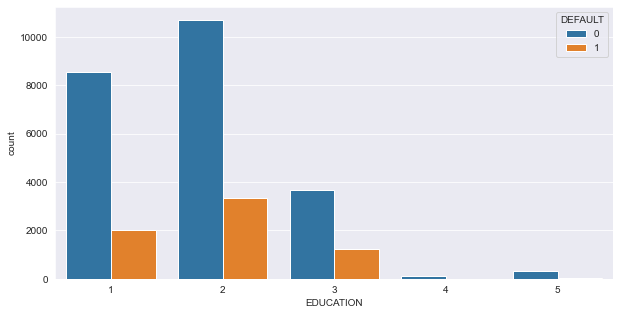

In [16]:
#Is default proportion affected by education?
_= compare_defaults(dataset, 'EDUCATION',{
        0: "0",
        1: "Grad School",
        2: "University",
        3: "High School",
        4: "Others",
        5: "Unknown"
    })

* Default propotion increases as education level increases

MARRIAGE,Married,Single,Others,All
DEFAULT,,,,
Non-default proportion,0.765283,0.790717,0.763926,0.7788
Default proportion,0.234717,0.209283,0.236074,0.2212
All,1.000000,1.000000,1.000000,1.0000


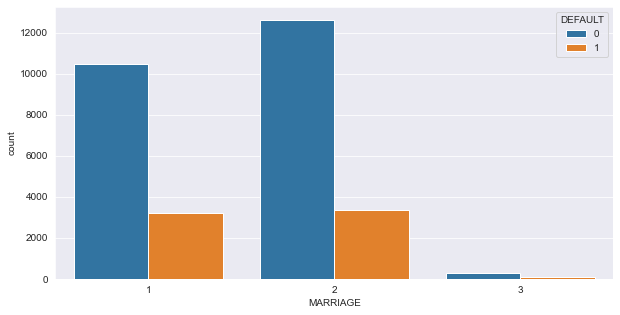

In [17]:
#Is default proportion affected by marital status?
_= compare_defaults(dataset,'MARRIAGE', { 1:'Married', 2:'Single', 3:'Others'})

* Propotion of defaulters is little more in married people

age_group,20s,30s,40s,50s,60s,70s,All
DEFAULT,,,,,,,
Non-default proportion,0.771574,0.797473,0.770266,0.751388,0.716561,0.72,0.7788
Default proportion,0.228426,0.202527,0.229734,0.248612,0.283439,0.28,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0000


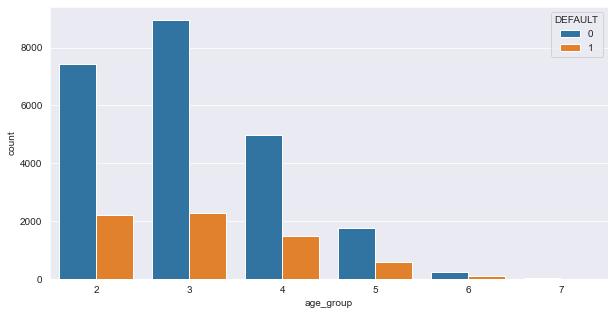

In [18]:
#Is the proportion of defaults correlated with age?
# Creating the age bins
dataset['age_group'] = dataset['AGE']//10 
age_cross_tab = compare_defaults(dataset, 'age_group',{2:'20s',3:'30s', 4:'40s', 5:'50s', 6:'60s', 7:'70s', 8:'80s'})


<AxesSubplot:xlabel='age_group'>

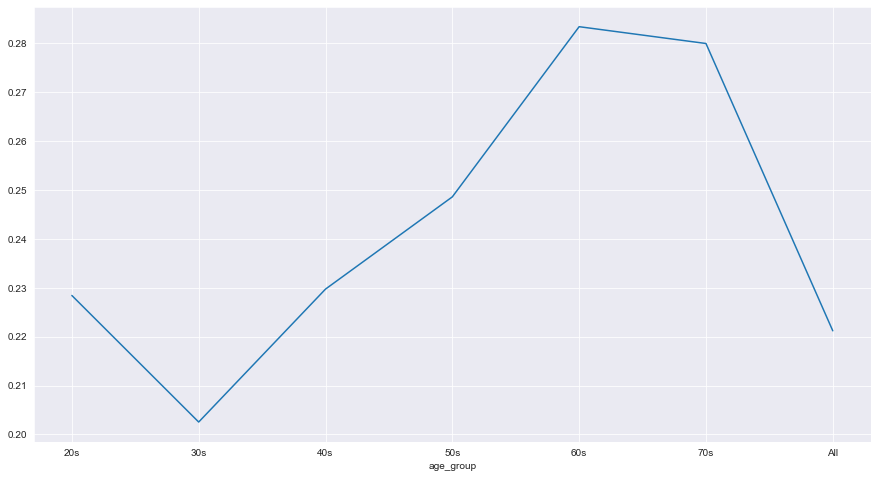

In [19]:
#  Bar plot
age_cross_tab.loc["Default proportion"].plot(kind="line",figsize=(15, 8))


* default proportion is lowest for people in their 30s and then steadily rises with age
* however number of credit card holders are more in age group 30 and decreasing as age increases. More number of defaulters are at the age 30. 

<Figure size 1080x576 with 0 Axes>

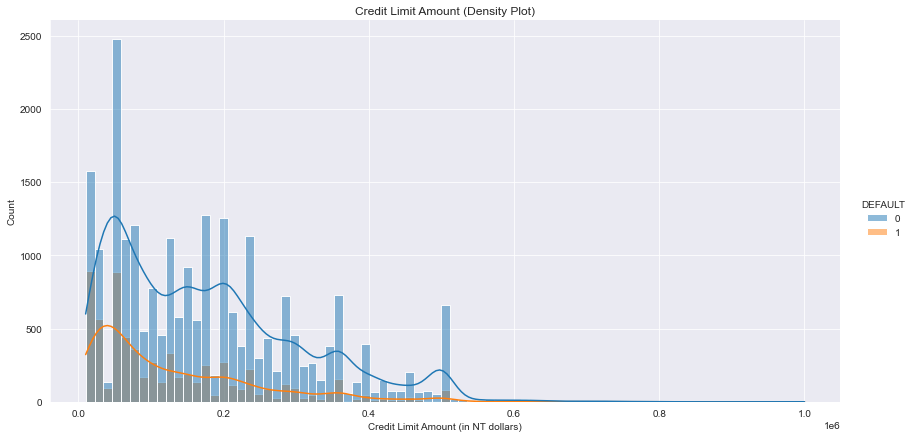

In [20]:
# Is the default proportion affected by credit limit?
plt.figure(figsize = (15,8))
sns.displot(data=dataset, x="LIMIT_BAL", hue="DEFAULT", kind="hist", kde = True, height=6,aspect=2)
plt.title('Credit Limit Amount (Density Plot)')
plt.xlabel('Credit Limit Amount (in NT dollars)')
plt.show()

* It seems that people with higher credit limit have significantly lower default proportion

<AxesSubplot:xlabel='PAY_6', ylabel='count'>

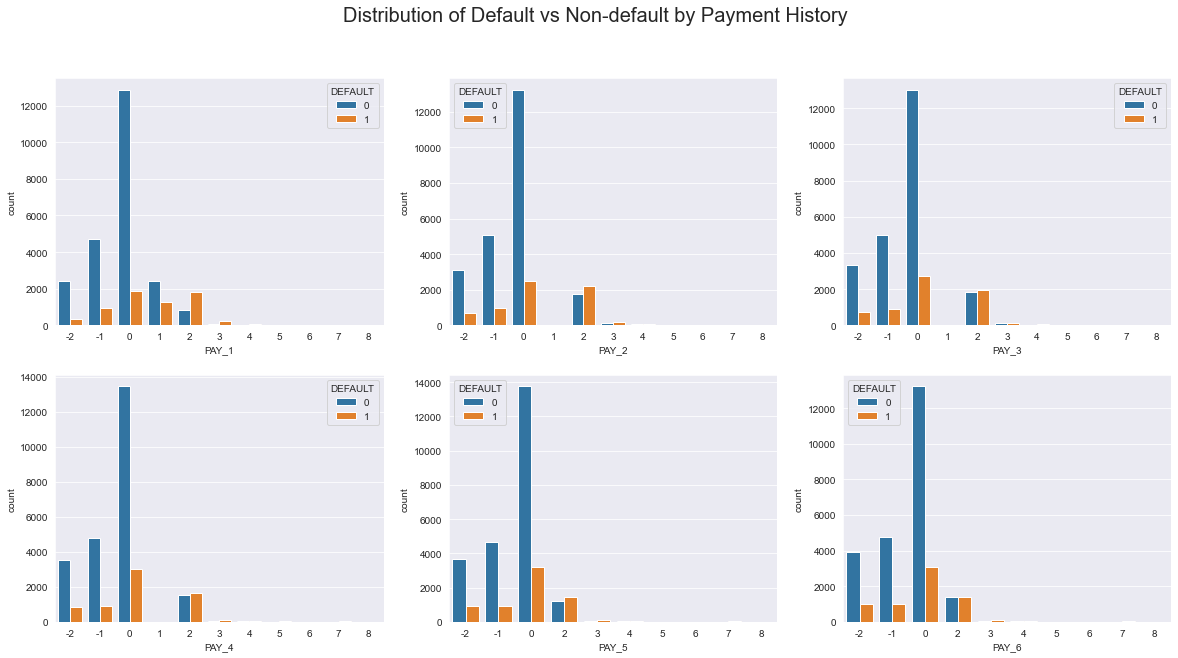

In [21]:
pay_hist = dataset[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']]

f, axes = plt.subplots(2, 3, figsize=(20, 10))
f.suptitle('Distribution of Default vs Non-default by Payment History', size=20)
sns.countplot(x='PAY_1', hue="DEFAULT", data=pay_hist, ax=axes[0,0])
sns.countplot(x="PAY_2", hue="DEFAULT", data=pay_hist, ax=axes[0,1])
sns.countplot(x="PAY_3", hue="DEFAULT", data=pay_hist, ax=axes[0,2])
sns.countplot(x="PAY_4", hue="DEFAULT", data=pay_hist, ax=axes[1,0])
sns.countplot(x="PAY_5", hue="DEFAULT", data=pay_hist, ax=axes[1,1])
sns.countplot(x="PAY_6", hue="DEFAULT", data=pay_hist, ax=axes[1,2])


* I notice that if the person has defaulted for 2 months or more in the past two months, there is a very high chance of them defaulting.

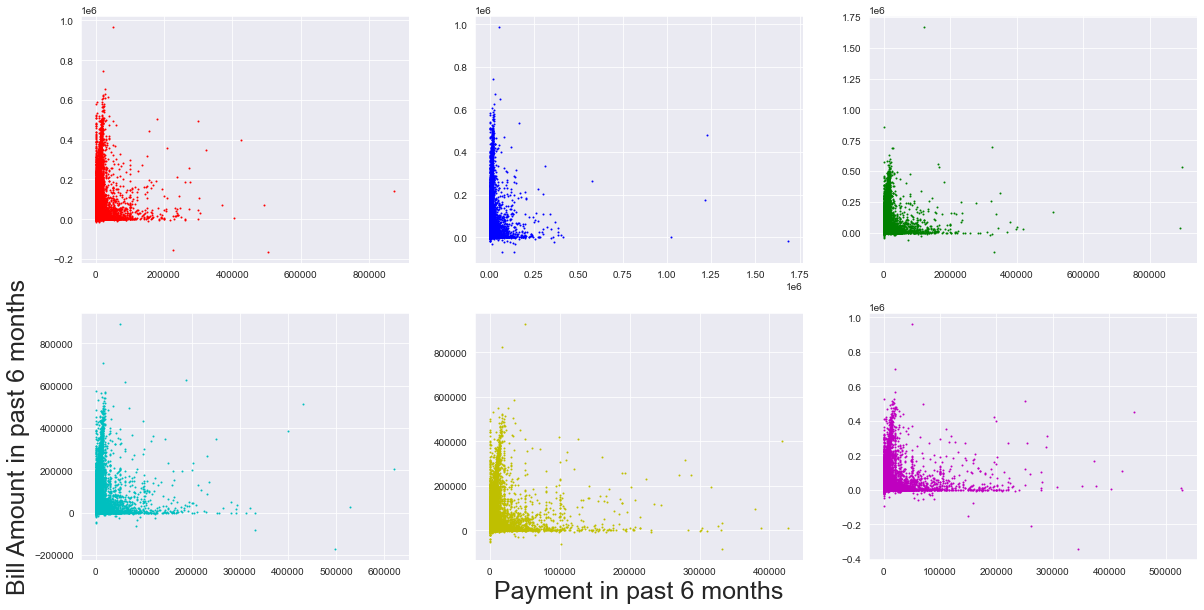

In [22]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=dataset.PAY_AMT1, y=dataset.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=dataset.PAY_AMT2, y=dataset.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=dataset.PAY_AMT3, y=dataset.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=dataset.PAY_AMT4, y=dataset.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=dataset.PAY_AMT5, y=dataset.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=dataset.PAY_AMT6, y=dataset.BILL_AMT6, c='m', s=1)

plt.show()

* Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low.

## Correlation between the variable

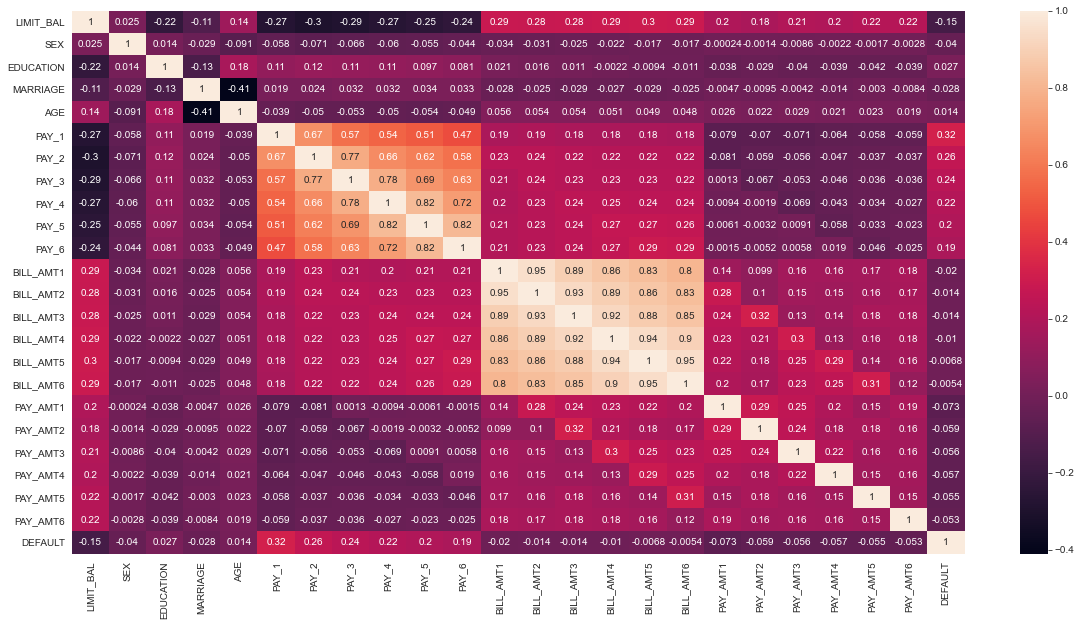

In [23]:
# Visualizing correlation between variables
dataset1 = dataset.drop(['age_group'], axis=1)
plt.figure(figsize = (20, 10))
corrMatrix = dataset1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

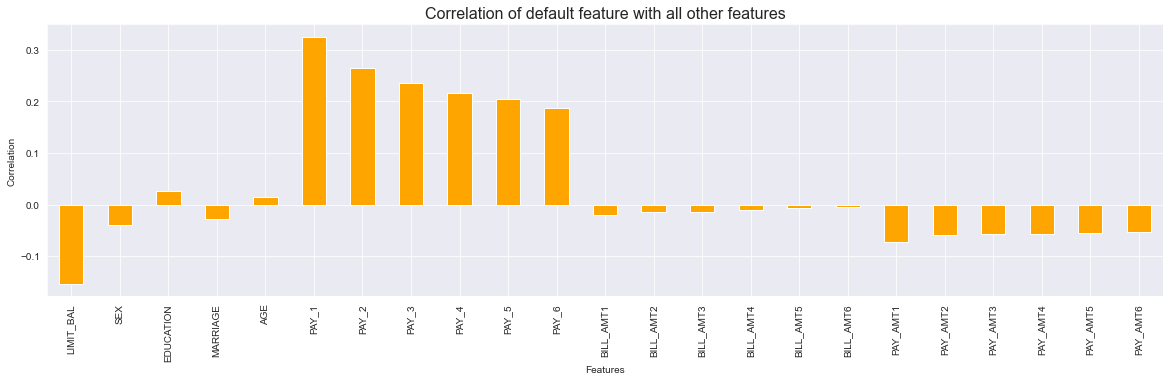

In [24]:
corrMatrix.iloc[:-1,-1].plot.bar(color='orange')
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title("Correlation of default feature with all other features", fontdict={'size':16})
plt.show()

In [96]:
print(corrMatrix.iloc[:-1,-1])

LIMIT_BAL   -0.153520
SEX         -0.039961
EDUCATION    0.026969
MARRIAGE    -0.027575
AGE          0.013890
PAY_1        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
PAY_AMT1    -0.072929
PAY_AMT2    -0.058579
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT5    -0.055124
PAY_AMT6    -0.053183
Name: DEFAULT, dtype: float64


* PAY_1, PAY_2 and LIMIT_BAL show high correlation with 'DEFAULT'.

## Logistic regression and Building the model

* Building a logistic regression  model on whole data.

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5995
           1       0.00      0.40      0.00         5

    accuracy                           0.78      6000
   macro avg       0.50      0.59      0.44      6000
weighted avg       1.00      0.78      0.88      6000



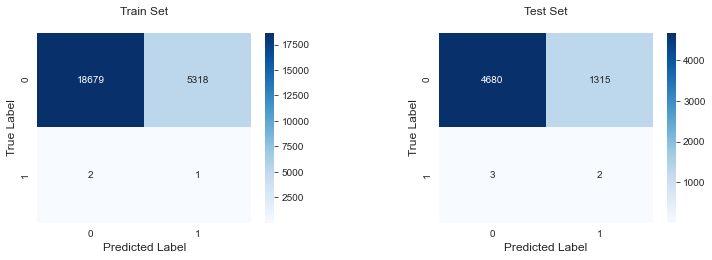


Accuracy Score for train data:  0.7783333333333333

Accuracy Score for test model:  0.7803333333333333


In [87]:
#whole data
import matplotlib.pyplot as plt
df_X = dataset1.drop(['DEFAULT'], axis=1)
df_y = dataset1.DEFAULT
#
# Splitting the data into train and test. train (0.8) and test (0.2)
#
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

y_pred = clf_logistic.predict(X_test)
y_pred_train = clf_logistic.predict(X_train)
print(classification_report(y_pred, y_test))
#print(confusion_matrix(y_pred, y_test))
cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(12, 3.5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="", cmap = 'Blues')
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title("Train Set\n")
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="", cmap = 'Blues')
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title("Test Set\n")
plt.subplots_adjust(wspace=0.5)
plt.show()
print('\nAccuracy Score for train data: ', accuracy_score(y_pred_train,y_train))
print('\nAccuracy Score for test model: ', accuracy_score(y_pred,y_test))



* If we use whole data for model building, Recall is 0.40. Means only 40% prediction of 'DEFAULT' will be accurate and 60% defaulter will not be detected with this model. there is multicollinearity in this data. I will try to remove it. 

In [186]:
#####VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
x_temp = sm.add_constant(X_train)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))

    VIF Factor   features
0         63.7      const
1          1.6  LIMIT_BAL
2          1.0        SEX
3          1.1  EDUCATION
4          1.2   MARRIAGE
5          1.3        AGE
6          1.9      PAY_1
7          3.2      PAY_2
8          3.7      PAY_3
9          4.3      PAY_4
10         4.7      PAY_5
11         3.2      PAY_6
12        13.8  BILL_AMT1
13        25.9  BILL_AMT2
14        23.0  BILL_AMT3
15        22.3  BILL_AMT4
16        25.7  BILL_AMT5
17        14.6  BILL_AMT6
18         1.7   PAY_AMT1
19         2.0   PAY_AMT2
20         1.8   PAY_AMT3
21         1.7   PAY_AMT4
22         1.7   PAY_AMT5
23         1.2   PAY_AMT6


* We noticed earlier and the vif scores reinforce that the bill amount variables are highly correlated. I noticed that they are not among the important features either making them good candidate features to be dropped.

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      6000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000



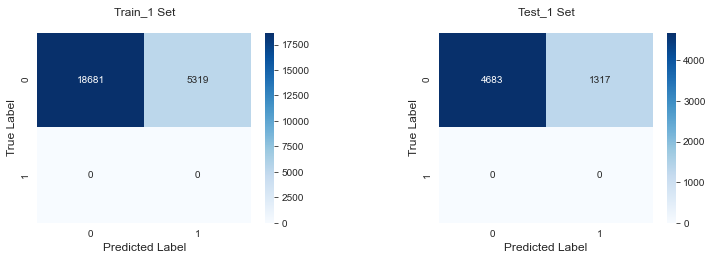


Accuracy Score for train_1 data:  0.778375

Accuracy Score for test_1 model:  0.7805


In [88]:
#Iteration 1
#Dropping 'BILL_AMT1','BILL_AMT2','BILL_AMT3'.....
dataset_1 = dataset1.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis = 1)
df_y_1 = dataset.DEFAULT
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(dataset_1, df_y_1, test_size=0.2, random_state=10)

clf_logistic_1 = LogisticRegression(solver='lbfgs').fit(X_train_1, np.ravel(y_train_1))
#
#Predictive modelling
#
y_pred_1 = clf_logistic_1.predict(X_test_1)
y_pred_train_1 = clf_logistic_1.predict(X_train_1)
print(classification_report(y_pred_1, y_test_1))
#
cm_train_1 = confusion_matrix(y_pred_train_1, y_train_1)
cm_test_1 = confusion_matrix(y_pred_1, y_test_1)
plt.figure(figsize=(12, 3.5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train_1, annot=True, fmt="", cmap = 'Blues')
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title("Train_1 Set\n")
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_1, annot=True, fmt="", cmap = 'Blues')
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title("Test_1 Set\n")
plt.subplots_adjust(wspace=0.5)
plt.show()
print('\nAccuracy Score for train_1 data: ', accuracy_score(y_pred_train_1,y_train_1))
print('\nAccuracy Score for test_1 model: ', accuracy_score(y_pred_1,y_test_1))



* Just dropping the BILL_AMT variables is giving recall = 0 for 'DEFAULT' which is not good. I will try to build the model using other combinations to find the good fit logistic regression model. 

### Modelling with Demographic data

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      6000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000



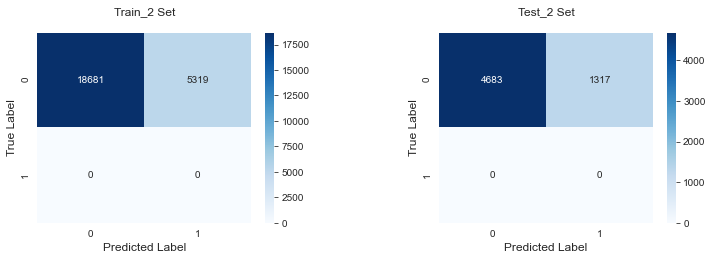


Accuracy Score for train_2 data:  0.778375

Accuracy Score for test_2 model:  0.7805


In [90]:
#Iterion 2
df_X_2 = dataset[['SEX','EDUCATION','MARRIAGE','AGE']]
df_y_2 = dataset.DEFAULT

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_X_2, df_y_2, test_size=0.2, random_state=10)

clf_logistic_2 = LogisticRegression(solver='lbfgs').fit(X_train_2, np.ravel(y_train_2))
y_pred_2 = clf_logistic_2.predict(X_test_2)
y_pred_train_2 = clf_logistic_2.predict(X_train_2)
print(classification_report(y_pred_2, y_test_2))
#
cm_train_2 = confusion_matrix(y_pred_train_2, y_train_2)
cm_test_2 = confusion_matrix(y_pred_2, y_test_2)
plt.figure(figsize=(12, 3.5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train_2, annot=True, fmt="", cmap = 'Blues')
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title("Train_2 Set\n")
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_2, annot=True, fmt="", cmap = 'Blues')
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title("Test_2 Set\n")
plt.subplots_adjust(wspace=0.5)
plt.show()
print('\nAccuracy Score for train_2 data: ', accuracy_score(y_pred_train_2,y_train_2))
print('\nAccuracy Score for test_2 model: ', accuracy_score(y_pred_2,y_test_2))



* When we use all demographic data to predict, the accuracy score have no big difference and recall is also 0. Trying another iteration

### Modelling with behavioural data

* PAY_1, PAY_2 .... also has highest correlation with each other. We can consider only one variable out of it. Considering PAY_1.

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      9000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      9000
   macro avg       0.50      0.39      0.44      9000
weighted avg       1.00      0.78      0.88      9000



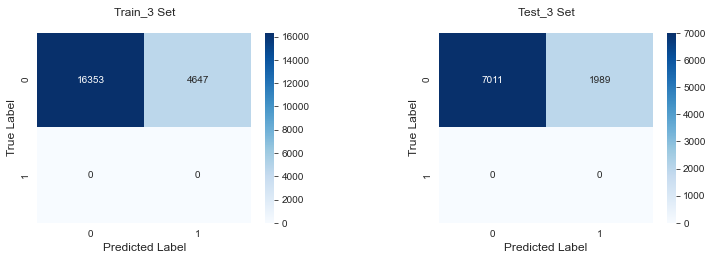


Accuracy Score for train_3 data:  0.7787142857142857

Accuracy Score for test_3 model:  0.779


In [92]:
#Iteration 3
df_X_3 = dataset[[ 'PAY_1', 'LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1']]
df_y_3 = dataset.DEFAULT

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_X_3, df_y_3, test_size=0.3, random_state=300)

clf_logistic_3 = LogisticRegression(solver='lbfgs').fit(X_train_3, np.ravel(y_train_3))

y_pred_3 = clf_logistic_3.predict(X_test_3)
y_pred_train_3 = clf_logistic_3.predict(X_train_3)
print(classification_report(y_pred_3, y_test_3))
#print(confusion_matrix(y_pred_3, y_test_3))
#print('\nAccuracy Score for test model: ', accuracy_score(y_pred_3,y_test_3))
#print('\nAccuracy Score for train data: ', accuracy_score(y_pred_train_3,y_train_3))
cm_train_3 = confusion_matrix(y_pred_train_3, y_train_3)
cm_test_3 = confusion_matrix(y_pred_3, y_test_3)
plt.figure(figsize=(12, 3.5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train_3, annot=True, fmt="", cmap = 'Blues')
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title("Train_3 Set\n")
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_3, annot=True, fmt="", cmap = 'Blues')
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title("Test_3 Set\n")
plt.subplots_adjust(wspace=0.5)
plt.show()
print('\nAccuracy Score for train_3 data: ', accuracy_score(y_pred_train_3,y_train_3))
print('\nAccuracy Score for test_3 model: ', accuracy_score(y_pred_3,y_test_3))


* We can not consider this model because recall = 0 and no change in accuracy too

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     10919
           1       0.28      0.68      0.40      1081

    accuracy                           0.82     12000
   macro avg       0.62      0.76      0.65     12000
weighted avg       0.90      0.82      0.85     12000



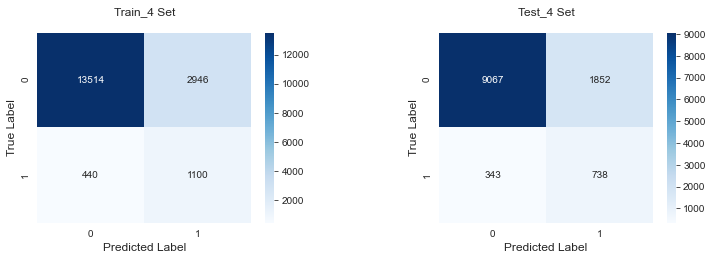


Accuracy Score for train_4 data:  0.8118888888888889

Accuracy Score for test_4 model:  0.8170833333333334


In [91]:
#Iteration 4
# taking out LIMIT_BAL
df_X_4 = dataset[['PAY_1','BILL_AMT1','PAY_AMT1']]
df_y_4 = dataset.DEFAULT

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(df_X_4, df_y_4, test_size=0.4, random_state=400)

clf_logistic_4 = LogisticRegression(solver='lbfgs').fit(X_train_4, np.ravel(y_train_4))

y_pred_4 = clf_logistic_4.predict(X_test_4)
y_pred_train_4 = clf_logistic_4.predict(X_train_4)
print(classification_report(y_pred_4, y_test_4))
#print(confusion_matrix(y_pred_4, y_test_4))
#print('\nAccuracy Score for test model: ', accuracy_score(y_pred_4,y_test_4))
#print('\nAccuracy Score for train data: ', accuracy_score(y_pred_train_4,y_train_4))
cm_train_4 = confusion_matrix(y_pred_train_4, y_train_4)
cm_test_4 = confusion_matrix(y_pred_4, y_test_4)
plt.figure(figsize=(12, 3.5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train_4, annot=True, fmt="", cmap = 'Blues')
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title("Train_4 Set\n")
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_4, annot=True, fmt="", cmap = 'Blues')
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title("Test_4 Set\n")
plt.subplots_adjust(wspace=0.5)
plt.show()
print('\nAccuracy Score for train_4 data: ', accuracy_score(y_pred_train_4,y_train_4))
print('\nAccuracy Score for test_4 model: ', accuracy_score(y_pred_4,y_test_4))


* Above model gives recall = 0.68 and accuracy around 81% but less variables are conidered while building the model.

### Model building with demographic and behavioural data

              precision    recall  f1-score   support

           0       0.97      0.83      0.89     13732
           1       0.27      0.70      0.39      1268

    accuracy                           0.82     15000
   macro avg       0.62      0.76      0.64     15000
weighted avg       0.91      0.82      0.85     15000



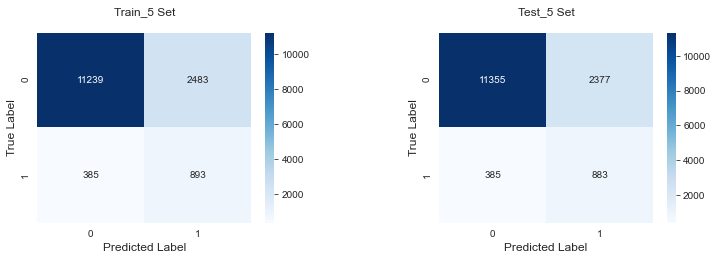


Accuracy Score for train_5 data:  0.8088

Accuracy Score for test_5 model:  0.8158666666666666


In [94]:
#Iteration 5
df_X_5 = dataset[['PAY_1','PAY_AMT1', 'EDUCATION', 'AGE', 'MARRIAGE']]
df_y_5 = dataset.DEFAULT

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(df_X_5, df_y_5, test_size=0.5, random_state=500)

clf_logistic_5 = LogisticRegression(solver='lbfgs').fit(X_train_5, np.ravel(y_train_5))

y_pred_5 = clf_logistic_5.predict(X_test_5)
y_pred_train_5 = clf_logistic_5.predict(X_train_5)
print(classification_report(y_pred_5, y_test_5))
#print(confusion_matrix(y_pred_5, y_test_5))
#print('\nAccuracy Score for test model: ', accuracy_score(y_pred_5,y_test_5))
#print('\nAccuracy Score for train data: ', accuracy_score(y_pred_train_5,y_train_5))
cm_train_5 = confusion_matrix(y_pred_train_5, y_train_5)
cm_test_5 = confusion_matrix(y_pred_5, y_test_5)
plt.figure(figsize=(12, 3.5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train_5, annot=True, fmt="", cmap = 'Blues')
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title("Train_5 Set\n")
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_5, annot=True, fmt="", cmap = 'Blues')
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title("Test_5 Set\n")
plt.subplots_adjust(wspace=0.5)
plt.show()
print('\nAccuracy Score for train_5 data: ', accuracy_score(y_pred_train_5,y_train_5))
print('\nAccuracy Score for test_5 model: ', accuracy_score(y_pred_5,y_test_5))



* The model is now correctly identifying almost 70% defaulters with high accuracy. Although it is still missing many of the defaulters, this is model is comparatevely good fit than others. I am finalizing this model as a logistic regression mode for credit card default predictions.


## Validation of logistic regression model

###  AUC-ROC Curve 


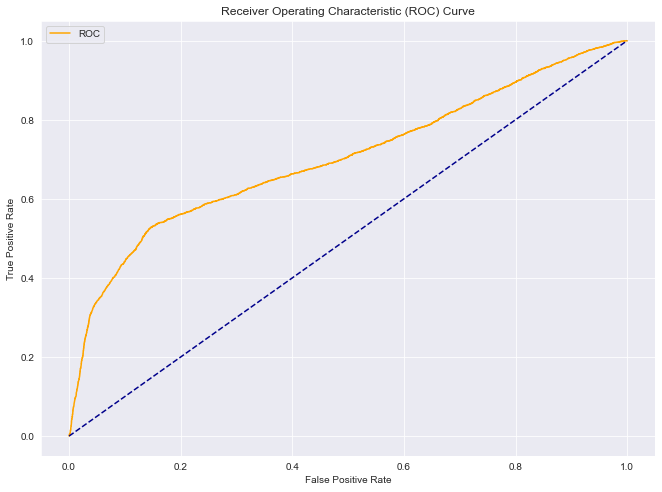

AUC =  0.7021832181937897
Accuracy score =  0.8158666666666666


In [107]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

preds = clf_logistic_5.predict_proba(X_test_5)

# Print the accuracy score the model
#print(clf_logistic_5.score(X_test_5, y_test_5))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test_5, prob_default)
plt.figure(figsize=(11, 8))
plt.plot(fallout, sensitivity, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test_5, prob_default)
print("AUC = ", auc)
print("Accuracy score = ",clf_logistic_5.score(X_test_5, y_test_5))

* AUC is 70% which is greater than 50%. This validates that our model is good fit for credit card default prediction.

## SUMMARY


### Key Takeaways:
* Credit behavior, which shows their delay status, is the most important indicator for Default.
* When payment is delayed more than 2 months, the chance of default goes higher than 50%.
* Demographic data have lower correlation to Default. However, we can still look for some indication.
* Married people have higher chances of Default.
* High School level have higher chance of Default.
* Age range around 30, have lower Default rate.

### Some data discrepancies
* Some clients who Paid in Full in recent month, turn out to be default.
* Some clients have a Negative Bill Amount. But still end up being default.
* Some clients Bill Amount is much higher than their Credit Limit provided.

### Suggestions
* To lower the risk of default, must be very cautious on client's payment behavior.
* More cautious on Married and High School level clients.
* Marketing campaign should be aiming on clients age around 30.
* Communicate with data collection team.
* Ensure proper documentation of data description.
